In [ ]:
# Enhancing Lung Sound Classification Using Transfer Learning with ResNet50 and Mel Spectrogram Pre-processing.
# Berikut langkah-langkah yang dilakukan pada penelitian lung sounds.
# 1. Pengumpulan Dataset:
#    Lokasi: /content/drive/MyDrive/Dataset ICBHI.
#    Label dataset: Crackles, Crackles_Wheezes, Wheezes.
# Jumlah file di folder Crackles: 257
# Jumlah file di folder Crackles_Wheezes: 58
# Jumlah file di folder Wheezes: 116
# Jumlah kelas: 3
# 2. Pra-pemrosesan:
#    a. Konversi Data Audio ke representasi tensor-float
#    b. Frekuensi sampling dengan target sampling rate sebesar 16 kHz (untuk mencapai keseragaman dan standarisasi).
#    c. Transformasi ke Mel Spectrogram
# 3. Augmentasi data dari Google Brain's SpecAugment".
# Hasil :
# Jumlah data untuk 1_Crackles: 514
# Jumlah data untuk 2_Crackles_Wheezes: 514
# Jumlah data untuk 3_Wheezes: 514
# Jumlah total data = 1542 (3 kelas X 514)
# 4. 10 Fold Cros Validation
# 5. Menjalankan Transfer Learning with Model ResNet50
# evaluasi metrik seperti accuracy, precision, recall, f1_score, auc dan confusion matrix.
#===============================================================================================================================================


In [ ]:
#Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install librosa
import librosa
import soundfile as sf
!pip install soundfile
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
#import pywt
from scipy import signal
!pip install tensorflow tensorflow_hub librosa scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 602.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
# Load packgae drive
from google.colab import drive

In [ ]:
 # Memberikan akses kepada Colab / Autorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Menentukan path direktori utama
direktori_utama = "/content/drive/MyDrive/Dataset ICBHI"

# Menentukan path untuk masing-masing folder
path_crackles = os.path.join(direktori_utama, "1_Crackles")
path_crackles_wheezes = os.path.join(direktori_utama, "2_Crackles_Wheezes")
path_wheezes = os.path.join(direktori_utama, "3_Wheezes")

# Mendefinisikan label
labels = ["Crackles", "Crackles_Wheezes", "Wheezes" ]
num_classes = len(labels)

# Mendapatkan daftar file di masing-masing folder
file_crackles = os.listdir(path_crackles)
file_wheezes = os.listdir(path_wheezes)
file_crackles_wheezes = os.listdir(path_crackles_wheezes)

# Menampilkan jumlah file di masing-masing folder
print("Jumlah file di folder Crackles:", len(file_crackles))
print("Jumlah file di folder Crackles_Wheezes:", len(file_crackles_wheezes))
print("Jumlah file di folder Wheezes:", len(file_wheezes))

# Menampilkan jumlah kelas
print("Jumlah kelas:", num_classes)

Jumlah file di folder Crackles: 257
Jumlah file di folder Crackles_Wheezes: 58
Jumlah file di folder Wheezes: 116
Jumlah kelas: 3


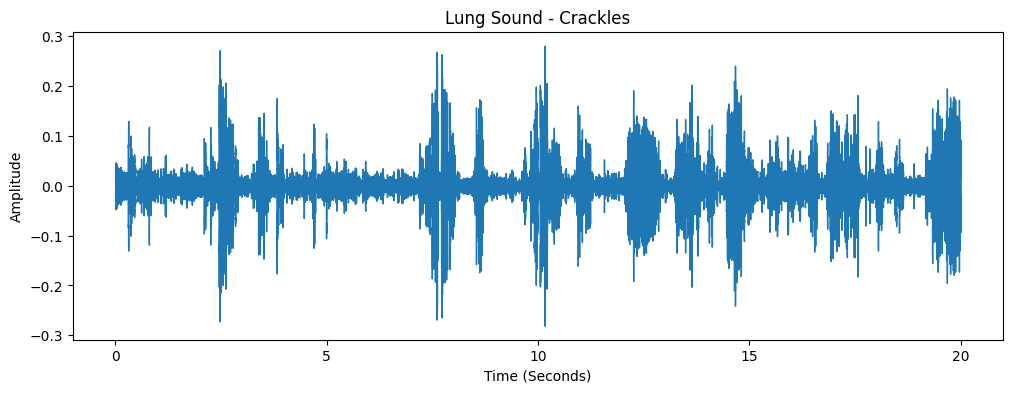

In [ ]:
# Menampilkan sinyal suara paru-paru Crackles
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset ICBHI/1_Crackles/Crackles_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Crackles')
plt.show()

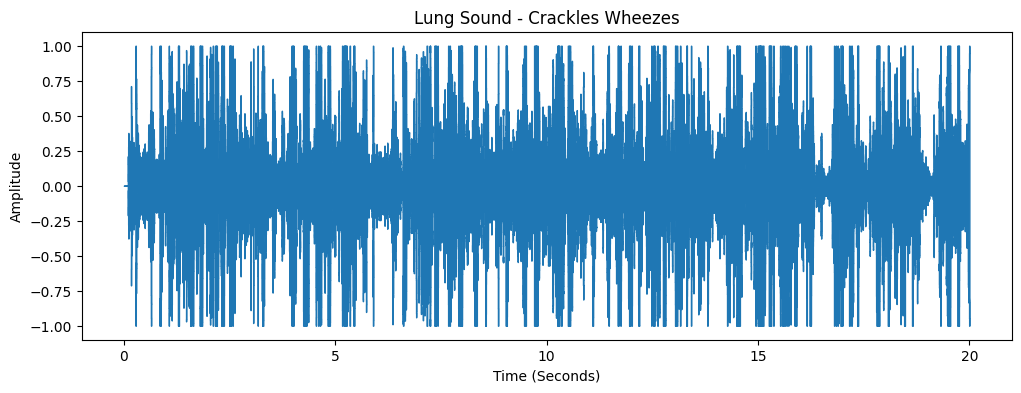

In [ ]:
# Menampilkan sinyal suara paru-paru Crackles Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset ICBHI/2_Crackles_Wheezes/Crackles and Wheezes_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Crackles Wheezes')
plt.show()

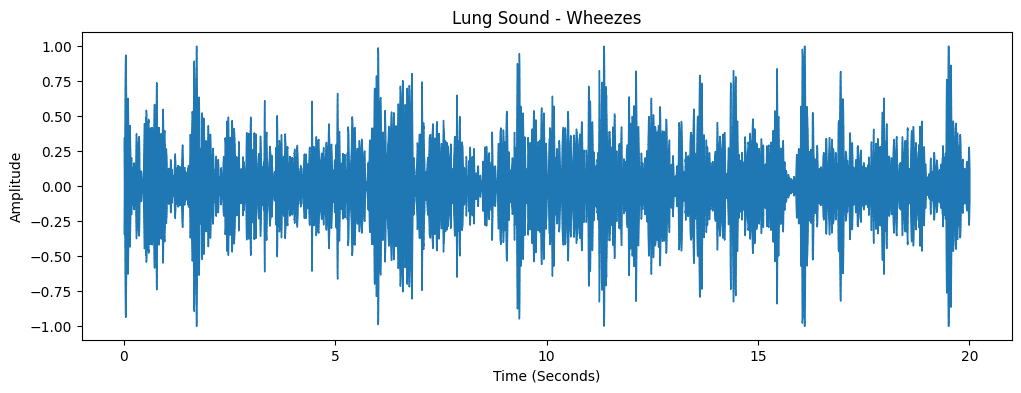

In [ ]:
# Menampilkan sinyal suara paru-paru Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset ICBHI/3_Wheezes/Wheezes_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Wheezes')
plt.show()

In [ ]:
# Konversi Data Audio ke representasi tensor-float
import os
import librosa
import numpy as np

def convert_audio_to_tensor_float(input_path, output_path):
    folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

    for folder in folders:
        input_folder_path = os.path.join(input_path, folder)
        output_folder_path = os.path.join(output_path, folder)

        if not os.path.exists(input_folder_path):
            print(f"[SKIP] Folder tidak ditemukan: {input_folder_path}")
            continue

        os.makedirs(output_folder_path, exist_ok=True)

        success_count = 0
        fail_count = 0

        for filename in os.listdir(input_folder_path):
            if filename.lower().endswith('.wav'):
                file_path = os.path.join(input_folder_path, filename)

                try:
                    # Load audio
                    audio_data, sr = librosa.load(file_path, sr=None)
                    audio_tensor = np.array(audio_data, dtype=np.float32)

                    # Save as .npy
                    output_file_path = os.path.join(output_folder_path, filename.replace('.wav', '.npy'))
                    np.save(output_file_path, audio_tensor)

                    success_count += 1
                    print(f"[OK] {folder}/{filename} -> {success_count}")
                except Exception as e:
                    fail_count += 1
                    print(f"[ERROR] Gagal memproses {folder}/{filename}: {e}")

        print(f"\n📂 Folder {folder}: Sukses {success_count}, Gagal {fail_count}\n")

# Path input/output
input_path = "/content/drive/MyDrive/Dataset ICBHI"
output_path = "/content/drive/MyDrive/Dataset ICBHI/A_Konversi Data Audio ke representasi tensor-float"

# Run
convert_audio_to_tensor_float(input_path, output_path)

print("✅ Proses konversi selesai.")


In [ ]:
# Menampilkan Jumlah file audio yang berhasil dikonversi ke representasi tensor-float
import os

def count_converted_files(output_path):
    """
    Counts the number of tensor-float files in the output path.
    """
    total_files = 0
    folder_counts = {}

    for folder in ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]:
        output_folder_path = os.path.join(output_path, folder)
        if os.path.exists(output_folder_path):
            file_count = len([f for f in os.listdir(output_folder_path) if f.endswith('.npy')])
            folder_counts[folder] = file_count
            total_files += file_count

    return folder_counts, total_files

# Define output path
output_path = "/content/drive/MyDrive/Dataset ICBHI/A_Konversi Data Audio ke representasi tensor-float"

# Count converted files
folder_counts, total_files = count_converted_files(output_path)

# Print results
print("Jumlah file yang berhasil dikonversi di setiap folder:")
for folder, count in folder_counts.items():
    print(f"{folder}: {count} file")

print(f"Total file yang berhasil dikonversi: {total_files} file")


In [ ]:
# Frekuensi sampling 16kHz
import os
import librosa
import soundfile as sf
import numpy as np
!pip install pydub
!apt-get install ffmpeg -y
from pydub import AudioSegment

def resample_audio(file_path, target_sampling_rate=16000):
    try:
        # Coba dengan librosa
        audio, original_sampling_rate = librosa.load(file_path, sr=None, mono=True)
        resampled_audio = librosa.resample(audio, orig_sr=original_sampling_rate, target_sr=target_sampling_rate)
        return resampled_audio
    except Exception as e:
        print(f"[WARN] Librosa gagal baca {file_path}, mencoba pydub...")

        try:
            # Load dengan pydub, ubah ke mono dan set frame rate
            audio = AudioSegment.from_file(file_path)
            audio = audio.set_channels(1).set_frame_rate(target_sampling_rate)

            # Konversi ke numpy array
            samples = np.array(audio.get_array_of_samples()).astype(np.float32)
            samples /= np.iinfo(audio.array_type).max  # normalisasi -1.0 s/d 1.0
            return samples
        except Exception as e2:
            print(f"[ERROR] Pydub juga gagal baca {file_path}: {e2}")
            return None

# Path dataset asli dan hasil
base_path = "/content/drive/MyDrive/Dataset ICBHI"
processed_path = "/content/drive/MyDrive/Dataset ICBHI/B_Frekuensi sampling 16kHz"
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    processed_folder_path = os.path.join(processed_path, folder)

    os.makedirs(processed_folder_path, exist_ok=True)

    audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.mp3'))]
    jumlah_disampling = 0
    jumlah_dilewati = 0

    for audio_file in audio_files:
        file_path = os.path.join(folder_path, audio_file)
        output_path = os.path.join(processed_folder_path, audio_file)

        resampled_audio = resample_audio(file_path, target_sampling_rate=16000)
        if resampled_audio is None:
            jumlah_dilewati += 1
            continue  # Skip file yang gagal

        sf.write(output_path, resampled_audio, 16000)
        jumlah_disampling += 1

    print(f"\n📁 Folder '{folder}':")
    print(f"   ✅ Disampling: {jumlah_disampling}")
    print(f"   ❌ Dilewati (gagal): {jumlah_dilewati}")


In [ ]:
# Mengubah dalam bentuk Mel Spectogram
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Direktori sumber dan tujuan
source_base_dir = '/content/drive/MyDrive/Dataset ICBHI/B_Frekuensi sampling 16kHz'
target_base_dir = '/content/drive/MyDrive/Dataset ICBHI/C_Mel Spectogram'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Membuat folder tujuan jika belum ada
for folder in folders:
    target_folder = os.path.join(target_base_dir, folder)
    os.makedirs(target_folder, exist_ok=True)

def create_mel_spectrogram(file_path, save_path):
    # Load file audio
    y, sr = librosa.load(file_path)
    # Mengubah sinyal audio menjadi Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Menyimpan Mel Spectrogram sebagai gambar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Proses setiap folder dan file di dalamnya
for folder in folders:
    source_folder = os.path.join(source_base_dir, folder)
    target_folder = os.path.join(target_base_dir, folder)

    for filename in os.listdir(source_folder):
        if filename.endswith('.wav'):
            source_file_path = os.path.join(source_folder, filename)
            target_file_path = os.path.join(target_folder, os.path.splitext(filename)[0] + '.png')
            create_mel_spectrogram(source_file_path, target_file_path)



In [ ]:
# Menampilkan jumlah file pada masing-masing kelas Mel Spectogram
import os

# Path to the main directory
base_path = "/content/drive/MyDrive/Dataset ICBHI/C_Mel Spectogram"

# List of folders to check
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Function to count files in a folder
def count_files_in_folder(folder_path):
    try:
        return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    except FileNotFoundError:
        return 0

# Iterate through each folder and count the files
file_counts = {}
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    file_counts[folder] = count_files_in_folder(folder_path)

# Print the results
for folder, count in file_counts.items():
    print(f"Jumlah file di {folder}: {count}")


Jumlah file di 1_Crackles: 256
Jumlah file di 2_Crackles_Wheezes: 58
Jumlah file di 3_Wheezes: 116


In [ ]:
# Augmentasi dengan target 514
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random

# Fungsi SpecAugment
def time_warp(spec, W=5):
    num_rows = spec.shape[1]
    src_pts = np.random.randint(W, num_rows - W, size=1)
    dest_pts = src_pts + np.random.randint(-W, W, size=1)
    spec[:, src_pts] = spec[:, dest_pts]
    return spec

def freq_mask(spec, F=30, num_masks=1):
    cloned = spec.copy()
    num_mel_channels = cloned.shape[0]
    for _ in range(num_masks):
        f = np.random.uniform(0, F)
        f_zero = int(np.random.uniform(0, num_mel_channels - f))
        cloned[f_zero:f_zero + int(f)] = 0
    return cloned

def time_mask(spec, T=40, num_masks=1):
    cloned = spec.copy()
    len_spectro = cloned.shape[1]
    for _ in range(num_masks):
        t = np.random.uniform(0, T)
        t_zero = int(np.random.uniform(0, len_spectro - t))
        cloned[:, t_zero:t_zero + int(t)] = 0
    return cloned

def spec_augment(spec, W=5, F=30, T=40, num_freq_masks=1, num_time_masks=1):
    spec = time_warp(spec, W)
    spec = freq_mask(spec, F, num_freq_masks)
    spec = time_mask(spec, T, num_time_masks)
    return spec

# Path
input_base_path = '/content/drive/MyDrive/Dataset ICBHI/C_Mel Spectogram'
output_base_path = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment_2'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Target augmentasi
target_count = 514

# Pastikan folder output ada
os.makedirs(output_base_path, exist_ok=True)

for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Salin file PNG asli ke output
    for file_name in os.listdir(input_folder):
        src = os.path.join(input_folder, file_name)
        if os.path.isfile(src) and src.endswith('.png'):
            shutil.copy(src, output_folder)

    # Hitung jumlah file hasil salinan
    current_count = len([f for f in os.listdir(output_folder) if f.endswith('.png')])

    # Augmentasi jika jumlah < target
    if current_count >= target_count:
        continue

    files = [f for f in os.listdir(output_folder) if f.endswith('.png')]
    if not files:
        print(f"[PERINGATAN] Tidak ada file PNG di folder {output_folder}")
        continue

    while current_count < target_count:
        file_name = random.choice(files)
        full_file_name = os.path.join(output_folder, file_name)

        mel_spec = plt.imread(full_file_name)
        augmented_spec = spec_augment(mel_spec)

        new_file_name = f"aug_{current_count}.png"
        output_file = os.path.join(output_folder, new_file_name)

        plt.imsave(output_file, augmented_spec, cmap='viridis')
        current_count += 1

# Tampilkan jumlah akhir
print("\n[INFO] Jumlah data per kelas setelah augmentasi:")
for folder in folders:
    folder_path = os.path.join(output_base_path, folder)
    file_count = len([f for f in os.listdir(folder_path) if f.endswith('.png')])
    print(f"- {folder}: {file_count} file")



[INFO] Jumlah data per kelas setelah augmentasi:
- 1_Crackles: 514 file
- 2_Crackles_Wheezes: 514 file
- 3_Wheezes: 514 file


In [ ]:
!pip install tensorflow tensorflow_hub librosa scikit-learn


In [ ]:
!pip install tensorflow-hub


In [ ]:
# Transfer learning with ResNet50
# 10 Fol Cross Validation
# Setiap Fold selesai dan berhenti, jika running lagi secara manual ke fold berikutnya.
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50'
progress_file = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50/progress.txt'  # File untuk menyimpan progress
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Initialize KFold for 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step : Modify the ResNet50 model for fine-tuning
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer with 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Increase dropout to 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Another dense layer
    x = tf.keras.layers.Dropout(0.6)(x)  # Another dropout
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer for num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Fungsi untuk menyimpan progress
def save_progress(fold_index):
    with open(progress_file, 'w') as f:
        f.write(str(fold_index))

# Fungsi untuk memuat progress
def load_progress():
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            return int(f.read().strip())
    return 0

# Memulai dari fold terakhir yang tersimpan
last_completed_fold = load_progress()

# Step 3: Cross-Validation Loop
metrics = {'fold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': [], 'confusion_matrix': []}

fold_index = 1
for train_idx, val_idx in kf.split(X):
    # Lewati fold yang sudah selesai
    if fold_index <= last_completed_fold:
        fold_index += 1
        continue

    print(f'Starting Fold {fold_index}...')

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Gunakan ImageDataGenerator hanya untuk scaling data, tanpa augmentasi
    train_datagen = ImageDataGenerator()  # Augmentasi di program sebelumnya akan berlaku
    val_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

    # Build fine-tuned ResNet50 model
    model = build_finetuned_resnet(num_classes=len(folders))

    # Add callbacks for early stopping, learning rate reduction, and model checkpoint
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),  # Reduce learning rate on plateau
        ModelCheckpoint(filepath=os.path.join(output_dir, f'best_model_fold_{fold_index}.h5'), save_best_only=True)
    ]

    # Latih model pada fold ini
    history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=callbacks)  # Increased epochs

    # Prediksi dan evaluasi
    y_pred = np.argmax(model.predict(X_val), axis=1)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, model.predict(X_val), multi_class='ovr')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Simpan metrik
    metrics['fold'].append(fold_index)
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1_score'].append(f1)
    metrics['auc'].append(auc)
    metrics['confusion_matrix'].append(conf_matrix)

    # Tampilkan hasil metrik
    print(f"Results for Fold {fold_index}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Set the figure size to be wider
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())  # Use plt.gca() to plot on the current axis
    plt.title(f'Confusion Matrix for Fold {fold_index}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Simpan model setelah setiap fold
    model.save(os.path.join(output_dir, f'model_fold_{fold_index}.h5'))

    # Simpan progress setelah fold selesai
    save_progress(fold_index)

    # Hentikan program setelah satu fold
    print(f"Fold {fold_index} selesai. Progres disimpan. Silakan lanjutkan program untuk fold berikutnya.")
    break  # Hentikan setelah satu fold

    fold_index += 1

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'cross_validation_metrics.csv'), index=False)

print("Cross-validation selesai. Semua model dan hasil telah disimpan di Google Drive.")
end_time = time.time()
duration = end_time - start_time
print(f"\nTotal waktu eksekusi program: {duration:.2f} detik")



In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# optimizer=Adam (learning_rate=1e-5) atau Learning rate 0.00001
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix di layar google golab.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Tambahkan callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=os.path.join(output_dir, 'best_model.h5'), save_best_only=True)
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=callbacks)

# Simpan Training Accuracy dan Validation Accuracy ke CSV
history_df = pd.DataFrame(history.history)
csv_path = os.path.join(output_dir, 'training_history.csv')
history_df.to_csv(csv_path, index=False)
print(f"Training history saved to {csv_path}")

# Plot Training Accuracy dan Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Optimizer=Adam(learning_rate=1e-5) atau Learning rate 0.00001
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix di layar google golab.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment_2'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]
model_path = os.path.join(output_dir, 'last_epoch_model.keras')
best_model_path = os.path.join(output_dir, 'best_model.keras')
final_model_path = os.path.join(output_dir, 'final_model.keras')
log_path = os.path.join(output_dir, 'training_log.csv')
os.makedirs(output_dir, exist_ok=True)

# Load dataset
def load_dataset(data_dir, folders):
    X, y = [], []
    class_map = {folder: idx for idx, folder in enumerate(folders)}
    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = preprocess_input(np.array(img))
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build model
def build_finetuned_resnet(num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[-10:]:
        layer.trainable = True
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi generator
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=32)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Load model dan log jika tersedia
initial_epoch = 0
if os.path.exists(model_path):
    print("✅ Loading model from last checkpoint...")
    model = tf.keras.models.load_model(model_path)
else:
    print("🚧 No previous model found. Building new model...")
    model = build_finetuned_resnet(num_classes=len(folders))

# Load training log untuk resume
if os.path.exists(log_path) and os.path.getsize(log_path) > 0:
    df = pd.read_csv(log_path)
    initial_epoch = len(df)
    print(f"🔁 Resuming from epoch {initial_epoch}")
else:
    print("📭 Log file is empty or not found. Starting from epoch 0.")

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(best_model_path, save_best_only=True),
    ModelCheckpoint(model_path, save_best_only=False),  # Save last epoch model
    CSVLogger(log_path, append=os.path.exists(log_path) and os.path.getsize(log_path) > 0)
]

# Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)

# Evaluasi
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir & metrik evaluasi
model.save(final_model_path)
pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
}).to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("✅ Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install tensorflow-io
import tensorflow_io as tfio


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Optimizer Adam, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/5_Model Deep Learning/Transfer Learning with ResNet50/Optimizer Adam'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.ckpt')  # Path untuk checkpoint
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    # Optimizer diubah menjadi Adam
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Cek apakah checkpoint ada
initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=30, initial_epoch=initial_epoch, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")

✅ Loading model from last checkpoint...
🔁 Resuming from epoch 45
Epoch 46/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 1115s 28s/step - accuracy: 0.9872 - loss: 0.0339 - val_accuracy: 0.9579 - val_loss: 0.1568 - learning_rate: 2.0000e-06
Epoch 47/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1101s 28s/step - accuracy: 0.9864 - loss: 0.0469 - val_accuracy: 0.9579 - val_loss: 0.1569 - learning_rate: 2.0000e-06
Epoch 48/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1087s 28s/step - accuracy: 0.9890 - loss: 0.0320 - val_accuracy: 0.9579 - val_loss: 0.1564 - learning_rate: 2.0000e-06
Epoch 49/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1079s 28s/step - accuracy: 0.9893 - loss: 0.0240 - val_accuracy: 0.9579 - val_loss: 0.1567 - learning_rate: 2.0000e-06
Epoch 50/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1079s 28s/step - accuracy: 0.9858 - loss: 0.0460 - val_accuracy: 0.9579 - val_loss: 0.1548 - learning_rate: 2.0000e-06
Epoch 51/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1077s 28s/step - accuracy: 0.9866 - loss: 0.0377 - val_accuracy: 0.9579 - val_loss: 0.1540 - learning_rate: 2.0000e-06
Epoch 52/75
39/39 ━━━━━━━━━━━━━━━━━━━━ 1081s 28s/step - accuracy

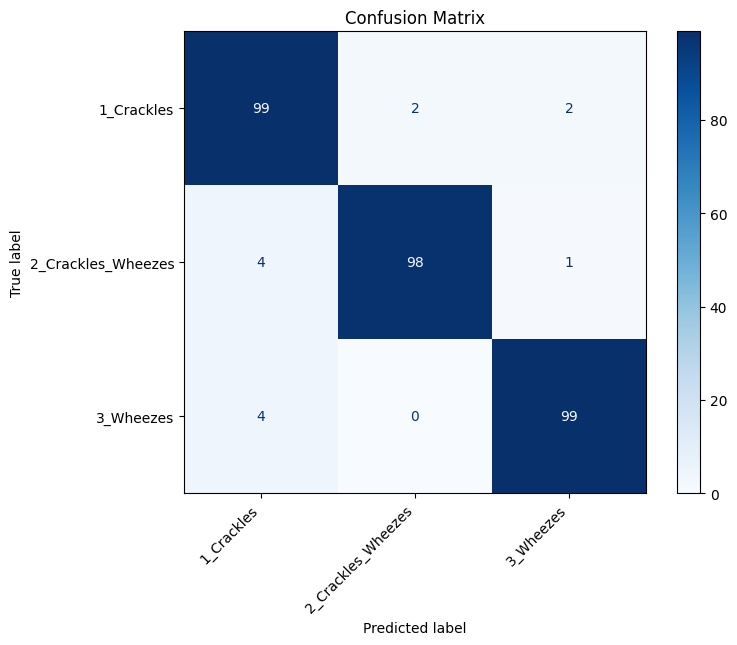

✅ Training and evaluation completed. Model and metrics saved to Google Drive.


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# optimizer=Adamax Learning rate 0.00005
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix di layar google golab.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment_2'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50/Adamax'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]
model_path = os.path.join(output_dir, 'last_epoch_model.keras')
best_model_path = os.path.join(output_dir, 'best_model.keras')
final_model_path = os.path.join(output_dir, 'final_model.keras')
log_path = os.path.join(output_dir, 'training_log.csv')
os.makedirs(output_dir, exist_ok=True)

# Load dataset
def load_dataset(data_dir, folders):
    X, y = [], []
    class_map = {folder: idx for idx, folder in enumerate(folders)}
    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = preprocess_input(np.array(img))
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build model
def build_finetuned_resnet(num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[-10:]:
        layer.trainable = True
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)

    # Gunakan Adamax optimizer dan learning rate 0.00005
    model.compile(optimizer=Adamax(learning_rate=5e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Inisialisasi generator
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=32)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Load model dan log jika tersedia
initial_epoch = 0
if os.path.exists(model_path):
    print("✅ Loading model from last checkpoint...")
    model = tf.keras.models.load_model(model_path)
else:
    print("🚧 No previous model found. Building new model...")
    model = build_finetuned_resnet(num_classes=len(folders))

# Load training log untuk resume
if os.path.exists(log_path) and os.path.getsize(log_path) > 0:
    df = pd.read_csv(log_path)
    initial_epoch = len(df)
    print(f"🔁 Resuming from epoch {initial_epoch}")
else:
    print("📭 Log file is empty or not found. Starting from epoch 0.")

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(best_model_path, save_best_only=True),
    ModelCheckpoint(model_path, save_best_only=False),
    CSVLogger(log_path, append=os.path.exists(log_path) and os.path.getsize(log_path) > 0)
]

# Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=75,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)

# Evaluasi
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir & metrik evaluasi
model.save(final_model_path)
pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
}).to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("✅ Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Optimizer SGD, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment_2'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50/SGD'
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer dengan 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Dropout dengan 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Dense layer dengan 128 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Dropout dengan 60%
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer untuk num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with SGD optimizer
    model.compile(optimizer=SGD(learning_rate=0.00005, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Periksa apakah checkpoint sudah ada
checkpoint_path = os.path.join(output_dir, 'best_model.h5')
start_epoch = 0

if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat model dari checkpoint...")
    model = tf.keras.models.load_model(checkpoint_path)
else:
    print("Checkpoint tidak ditemukan. Memulai pelatihan dari awal.")
    model = build_finetuned_resnet(num_classes=len(folders))

# Tambahkan callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, verbose=1),
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator,
                    initial_epoch=start_epoch, epochs=10, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Optimizer RMSprop, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
!pip install tensorflow numpy pandas scikit-learn matplotlib Pillow


# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Dataset ICBHI/D_Augmentasi data dengan SpecAugment_2'
output_dir = '/content/drive/MyDrive/Dataset ICBHI/E_Transfer Learning with ResNet50/RMSProp'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.ckpt')  # Path untuk checkpoint
folders = ["1_Crackles", "2_Crackles_Wheezes", "3_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # Menggunakan optimizer RMSprop
    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=RMSprop(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Cek apakah checkpoint ada
initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=30, initial_epoch=initial_epoch, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")
